In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def seesaw_dynamics(t,y,ks=0.01,kf=0.1):
    #y[0] input w1,2
    #y[1] g1,2:2 (gate with output)
    #y[2] g1:1,2 (gate with input)
    #y[3] output w2,3
    #y[4] g1:1,f (gate with fuel)
    #y[5] fuel w2,f
    #y[6] (gate with threshold)
    
    yprime = np.zeros(len(y))
    yprime[0] = -ks * y[0]*y[1] + ks*y[2]*y[3] -ks * y[0]*y[4] + ks*y[2]*y[5] -kf*y[0]*y[6]
    yprime[1] = -ks * y[0]*y[1] + ks*y[2]*y[3]
    yprime[2] = ks * y[0]*y[1] - ks*y[2]*y[3] + ks * y[0]*y[4] - ks*y[2]*y[5]
    yprime[3] = ks * y[0]*y[1] - ks*y[2]*y[3]
    yprime[4] = -ks * y[0]*y[4] + ks*y[2]*y[5] 
    yprime[5] = ks * y[0]*y[4] - ks*y[2]*y[5] 
    yprime[6] = - kf*y[0]*y[6]
    return yprime

In [10]:
nlen = 3000 #minutes
sol_full = solve_ivp(seesaw_dynamics, [0, nlen], [1, 10, 0, 0,0,10,0.5],
                 dense_output=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


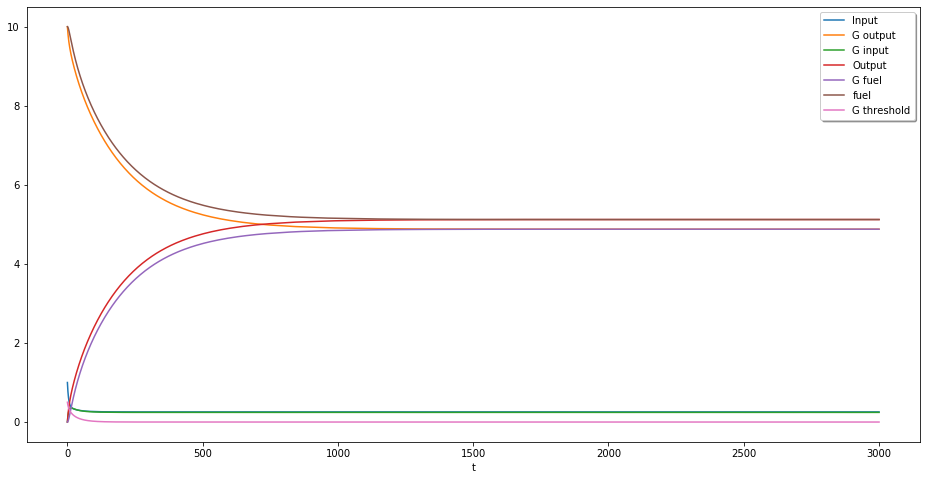

In [11]:
plt.figure(figsize = (16, 8))
t = np.linspace(0, nlen, 20*nlen)
z_full = sol_full.sol(t)
plt.plot(t, z_full.T)
plt.xlabel('t')
plt.legend(['Input','G output', 'G input', 'Output','G fuel','fuel','G threshold'], shadow=True)
plt.show()

In [12]:
my_network = {1:[3],2:[],3:[2]}
len(my_network)

3

In [13]:
def seesaw_network(t,y,network):
    #y structure:
    #y[0:len(network)]: w...
    #y[i*len(network)+j*4] -> gate i->j variables
    yprime = np.zeros(len(y))
    for i in network:
        for j in network[i]:
            
            concs = np.array([y[i-1],y[len(network)*(1+5*(i-1))+(j-1)*5],y[len(network)*(1+5*(i-1))+(j-1)*5+1], y[j-1],y[(1+5*(i-1))*len(network)+(j-1)*5+2],y[(1+5*(i-1))*len(network)+(j-1)*5+3],y[(1+5*(i-1))*len(network)+(j-1)*5+4]])
            #print(i,j,concs)
            tempprime = seesaw_dynamics(t,concs)
            #print("a",tempprime)
            yprime[i-1] += tempprime[0]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5] += tempprime[1]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+1] += tempprime[2]
            yprime[j-1] += tempprime[3]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+2] += tempprime[4]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+3] += tempprime[5]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+4] += tempprime[6]
            
    return yprime

In [14]:
nlen = 3000 #minutes
total_length = len(my_network)*(1+ len(my_network)*5)
start = np.zeros(total_length)
start[0] = 1
for i in my_network:
    for j in my_network[i]:
        start[(1+5*(i-1))*len(my_network)+(j-1)*5] = 10
        start[(1+5*(i-1))*len(my_network)+(j-1)*5+3] = 10

sol_full = solve_ivp(seesaw_network, [0, nlen], start,args=[my_network],
                 dense_output=True)

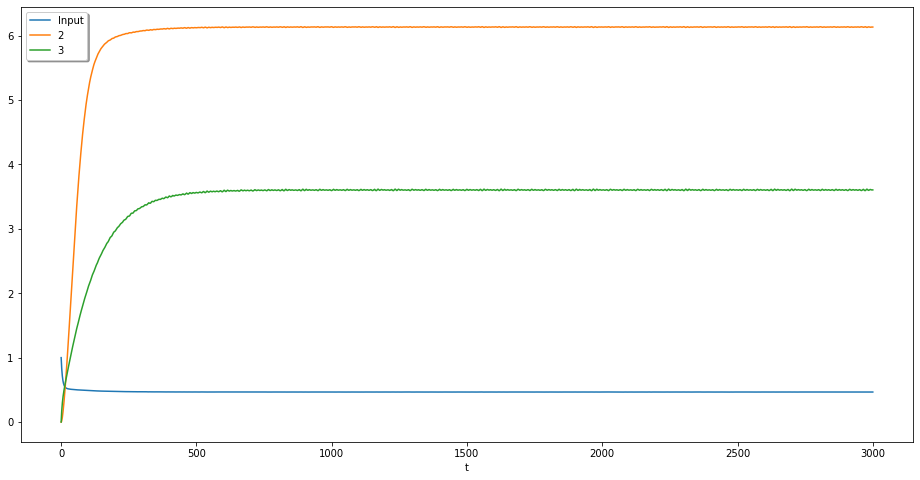

In [15]:
plt.figure(figsize = (16, 8))
t = np.linspace(0, nlen, 20*nlen)
z_full = sol_full.sol(t)
plt.plot(t, z_full[:3].T)
plt.xlabel('t')
plt.legend(['Input','2', '3'], shadow=True)
plt.show()